In [1]:
# 参考: https://qiita.com/shopetan/items/30f6e0932485c976a946

In [2]:
import numpy as np
import scipy as sc
from scipy import linalg
from scipy import spatial
import scipy.spatial.distance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pylab

In [3]:
# df = pd.read_csv('input.csv')
df = pd.read_csv('input.csv', index_col=0)
df

,a,b,c,d,e,f
1,0,1,2,3,4,5
2,6,1,12,3,6,7
3,7,11,32,7,6,9
4,2,6,5,3,3,5
5,3,0,0,2,5,0
6,3,2,1,2,1,2
7,1,1,3,2,1,2
8,0,4,4,1,1,1
9,0,1,1,2,1,1
10,1,2,1,5,3,2


In [4]:
ROW = 10
COLUMN = 6

row = []
column = []
ave = [0.0 for i in range(COLUMN)]
vcm = np.zeros((ROW, COLUMN, COLUMN))
diff = np.zeros((1, COLUMN))
mahal = np.zeros(ROW)
tmp = np.zeros(COLUMN)


In [5]:
# 各特徴量毎
for i in range(COLUMN):
    column.append(list(df.iloc[:, i]))
print(column)

print('------')

# 各レコード毎
for i in range(0, ROW):
#     print(i)
#     print(row)
    row.append(list(df.iloc[i, :]))
print(row)


[[0, 6, 7, 2, 3, 3, 1, 0, 0, 1], [1, 1, 11, 6, 0, 2, 1, 4, 1, 2], [2, 12, 32, 5, 0, 1, 3, 4, 1, 1], [3, 3, 7, 3, 2, 2, 2, 1, 2, 5], [4, 6, 6, 3, 5, 1, 1, 1, 1, 3], [5, 7, 9, 5, 0, 2, 2, 1, 1, 2]]
------
[[0, 1, 2, 3, 4, 5], [6, 1, 12, 3, 6, 7], [7, 11, 32, 7, 6, 9], [2, 6, 5, 3, 3, 5], [3, 0, 0, 2, 5, 0], [3, 2, 1, 2, 1, 2], [1, 1, 3, 2, 1, 2], [0, 4, 4, 1, 1, 1], [0, 1, 1, 2, 1, 1], [1, 2, 1, 5, 3, 2]]


In [6]:
# 各特徴量毎の平均値の計算
for i in range(COLUMN):
    # スライスという技法
    ave[i] = np.average(column[i][0:len(column[i])])


In [7]:
# 分散共分散行列の計算
# Numpyのメソッドを使うので，array()でリストを変換した．
row = np.array([row])
ave = np.array(ave)

# 分散共分散行列を求める
# np.swapaxes()で軸を変換することができる．
for i in range(ROW):
    diff = (row[0][i] - ave)
    diff = np.array([diff])
    vcm[i] = (diff * np.swapaxes(diff, 0, 1)) / ROW


In [8]:
# mahalnobis distanceを求める
for i in range(ROW):
    # 一般逆行列を生成し，計算の都合上転値をかける
    vcm[i] = sc.linalg.pinv(vcm[i])
    vcm[i] = vcm[i].transpose()
    vcm[i] = np.identity(COLUMN)
    # 差分ベクトルの生成
    diff = (row[0][i] - ave)
    for j in range(COLUMN):
        tmp[j] = np.dot(diff, vcm[i][j])
    mahal[i] = np.dot(tmp, diff)

In [9]:
mahal

array([ 29.08,  73.48, 814.28,  13.48,  62.28,  34.68,  22.28,  25.08,
        46.08,  34.48])

マハラノビス距離
[ 5.39258751  8.5720476  28.53559181  3.67151195  7.89176786  5.88897275
  4.72016949  5.00799361  6.7882251   5.8719673 ]


Text(0, 0.5, 'y')

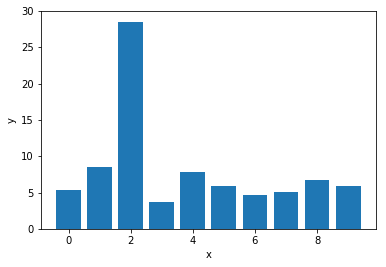

In [10]:
plot = pylab.arange(0.0, COLUMN, 1.0)
mahal = np.sqrt(mahal)

print("マハラノビス距離")
print(mahal)
plt.bar(range(ROW),mahal)
plt.title("")
plt.xlabel("x")
plt.ylabel("y")
